# Juego de la vida

#### Sergio Andrés Jiménez Jerez
#### Código: 2208059


A continuación se modelara el tan conocido juego de la vida para mas detalles vease:
_https://es.wikipedia.org/wiki/Juego_de_la_vida_

Para esta parte abordaremos mayores restricciones para empezar, dado que ingresaremos los datos de restricción, es decir: una persona muere si hay $m$ vecinos, nace si hay $v$ vecinos y sigue viviendo desde que hallan $v-1$, donde claramente $m>v$, para comenzar daremos valores de $m=4$ y $v=3$.
Tambien haremos que las personas que se encuentren en el borde mueran dado que nos facilitara los calculos pero con la justificación de que las personas viven tan lejos que podemos considerarlo un lugar critico.
Consideramos estos dos valores de $m,v$ como indica la regla original pero esto se puede modificar.

### Fase 1

En esta primera fase tan solo consideraremos el caso normal

In [66]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pylab import *
import matplotlib.gridspec as gridspec

#Segunda sección de librerias

from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation
from matplotlib.animation import FuncAnimation, PillowWriter  
%matplotlib notebook
import random

In [67]:
n=20                                                  #cantidad de la matriz cuadrada que queremos resolver
m=4                                                   #cantidad de vecinos para morir
v=3                                                   #cantidad de vecinos para nacer
a=np.random.randint(low=0,high=2,size=(n,n))

In [68]:
def borde(s):
    """
    Esta función nos hara el calculo critico de los bordes donde siempre los hace 0.
    """
    for i in range(n):
        s[0,i]=0
        s[n-1,i]=0
        s[i,0]=0
        s[i,n-1]=0
        
borde(a)                                                  #hacemos que a ya lleve los bordes

def crear(crear,cantidad,mm,vv):
    """
    Esta función creara una nueva matriz a partir de una matriz dada, esta nueva matriz viene dada por las
    reglas del juego de la vida.
    
    Parametros
    ----------
    crear: Es la matriz a cambiar, solo se espera matrices cuadradas.
    
    cantidad: Es el orden de la mtriz cuadrada la cual ingresa en crear.
    
    mm: Es el parametro de muertos, indica cuales mueren con valor igual o mayor a este.
    
    vv: Es el parametro de vivos, indica cuales nacen y tambien da a pie de cuales sobreviven.
    
    
    Retorno:
    ----------
    an: La matriz nueva de personas muertas y personas que nacen.
    
    Tambien grafica la matriz y al lado la matriz que cuenta los que siguen viviendo.
    """
    
    a1=np.roll(crear,axis=1, shift=1)                      #Creamos una nueva matriz como un desplazamiento de la ingresada
    a2=np.roll(a1,axis=0, shift=1)
    a3=np.roll(crear,axis=0, shift=1)
    a4=np.roll(a3,axis=1, shift=-1)
    a5=np.roll(crear,axis=1, shift=-1)
    a6=np.roll(a5,axis=0, shift=-1)
    a7=np.roll(crear,axis=0, shift=-1)
    a8=np.roll(a7,axis=1, shift=1)

    b=a1+a2+a3+a4+a5+a6+a7+a8                              #creamos la suma de todos los elementos que esten al rededor de cada punto  
    
    ceros=np.zeros((cantidad,cantidad))
    vivos=np.ones((cantidad,cantidad))*vv                  #creamos la restricción de los que van a vivir
    vivos2=np.ones((cantidad,cantidad))*(vv-1)             #creamos la condición de aquellos que seguiran viviendo
    muertos=np.ones((cantidad,cantidad))*mm                #creamos la restricción de los que van a morir
    crear2=(crear==ceros)*1                                #Matriz de crear pero con los valores invertidos
    
    m1=(b<muertos)*1                                       #m1 indica aquellos que mueren por sobrepoblación
    m2=(vivos2<=b)*1                                       #m2 indica aquellos vivos que mueren por falta de vecinos
    v1=(vivos<b)*1*crear2                                  #v1 interpreta aquellos que van a nacer
    v2=(vivos2==b)*1*crear                                 #v2 interpreta aquellos que continuan vivos por v-1 vecinos
    v3=(vivos==b)*1*crear                                  #v3 interpreta aquellos que continuan vivos por v vecinos
    k=(m1*m2*crear)+v1+v2+v3
    an=(k>ceros)*1
    borde(an)                                              #Hacemos que sus bordes sean cero por lo ya mencionado.
    doble=(crear*an)+an                                    #creamos la matriz que llevara el conteo de los que viven
    
    
    
    #G = gridspec.GridSpec(1, 2)                            #Especificar la geometía de la grilla, una matriz de 3x3

    #axes_1 = plt.subplot(G[0, 0])                          #Tomar la fila 0, la columna 0.
    #plt.imshow(an, cmap=cm.gray_r)                         #Graficamos en escala de Gris, negro para 1 y Blanco para 0
    #plt.xticks(np.arange(0, cantidad, step=1),[])          #Ponemos enmuneración de 0-n en los ejes
    #plt.yticks(np.arange(0, cantidad, step=1),[])
    #plt.tick_params(axis=u'both',which=u'both',length=0)
    #plt.grid()                                             #Hacemos la cuadricula para tener una mejor visualización
    #plt.xlabel('Matriz Cambio')
    
    
    #axes_2 = subplot(G[0, 1])
    #plt.imshow(doble, cmap=cm.gray_r)
    #plt.xticks(np.arange(0, cantidad, step=1),[])    
    #plt.yticks(np.arange(0, cantidad),[])
    #plt.tick_params(axis=u'both',which=u'both',length=0)
    #plt.grid()
    #plt.xlabel('Matriz que cuenta los mas viejos')
    
    
    return (an)

<IPython.core.display.Javascript object>


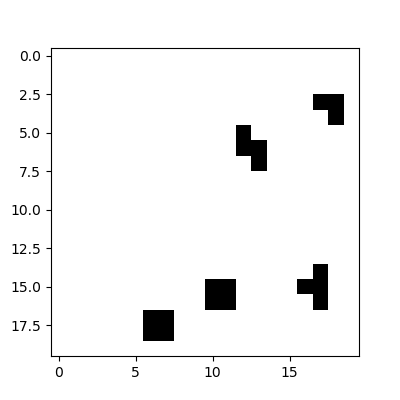

In [71]:
nuevo=np.zeros((n,n))
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
copia=a.copy()
imagen = ax.imshow(copia, interpolation="none", aspect = "equal", cmap=cm.gray_r)
def animate(i):
    global copia
    print(i)
    copia=crear(copia,n,m,v)
    imagen.set_data(copia)
    print(i)
    return imagen,
anim = animation.FuncAnimation(fig, animate, frames=100, blit=True, interval = 500, repeat = True)
plt.show()

### Segunda opción

# Pygifme instalación

Esta disponible desde pypi (Python Package Index).

Instalación
Puede instalarse fácilmente desde pypi con:

$ pip3 install pygifme
También puede instalarse vía el archivo setup.py:

$ python3 setup.py install
También es necesario instalar ImageMagick.

Puedes instalarlo con:

$ sudo pip3 install argcomplete
O via el archivo requirements.txt:

$ sudo pip3 install -r requirements.txt --use-mirrors

## Uso

$ pygifme ~/Desktop/1.png ~/Desktop/2.jpg
 You now have a handsome animation at ~/Desktop/animated.gif

Por supuesto también puedes agrupar archivos con glob:

$ pygifme ~/Desktop/*.jpg
 You now have a handsome animation at ~/Desktop/animated.gif
 
### A tener en cuenta

Para habilitar esta segunda opción deshabilite las librerias y habilite el codigo a continuación 
y la sección de la función

In [ ]:
#plt.imshow(a, cmap=cm.gray_r)                              #Graficamos el dato inicial para crear la animación
#plt.xticks(np.arange(0, n+1, step=1),[])
#plt.yticks(np.arange(0, n+1, step=1),[])
#plt.tick_params(axis=u'both',which=u'both',length=0)
#plt.title('Inicio de Juego de la vida')
#plt.grid()
#plt.savefig("0.jpg", bbox_inches='tight')                 #Guarda la imagen
#d=crear(a,n,m,v)                                          #Hacemos un nuevo contador y lo guardamos
#plt.savefig("1.jpg", bbox_inches='tight')
#plt.figure()
#for i in range(2):
#    d=crear(d,n,m,v)
#    s=i+2
#    y=str(s)
#    plt.savefig(y+".jpg", bbox_inches='tight')